# Preamble

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
import scipy
from scipy.stats import ks_2samp
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

# Data

In [4]:
f = open('./Data/halo_numbers.pkl', 'rb')
halo_num_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/numbers_cut.pkl', 'rb')
numbers_cut_data = pickle.load(f)
f.close()

f = open('./Data/star_metal_prof_cut.pkl', 'rb')
star_metal_prof_cut_data = pickle.load(f)
f.close()

In [5]:
halo_with_BH = halo_num_data['halo_with_BH']
halo_no_BH = halo_num_data['halo_no_BH']

In [6]:
all_halo_numbers = np.array(stellar_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH))
halo_no_BH_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH, invert = True))

In [7]:
stellar_metal = np.array(stellar_metal_data['tot_stellar_metal'])
stellar_metal_no_BH = stellar_metal[halo_no_BH_ind]

stellar_mass = np.array(stellar_metal_data["tot_stellar_mass"])
stellar_mass_no_BH = stellar_mass[halo_no_BH_ind]

BH_stellar_metal = stellar_metal[BH_halo_ind]
BH_stellar_mass = stellar_mass[BH_halo_ind]

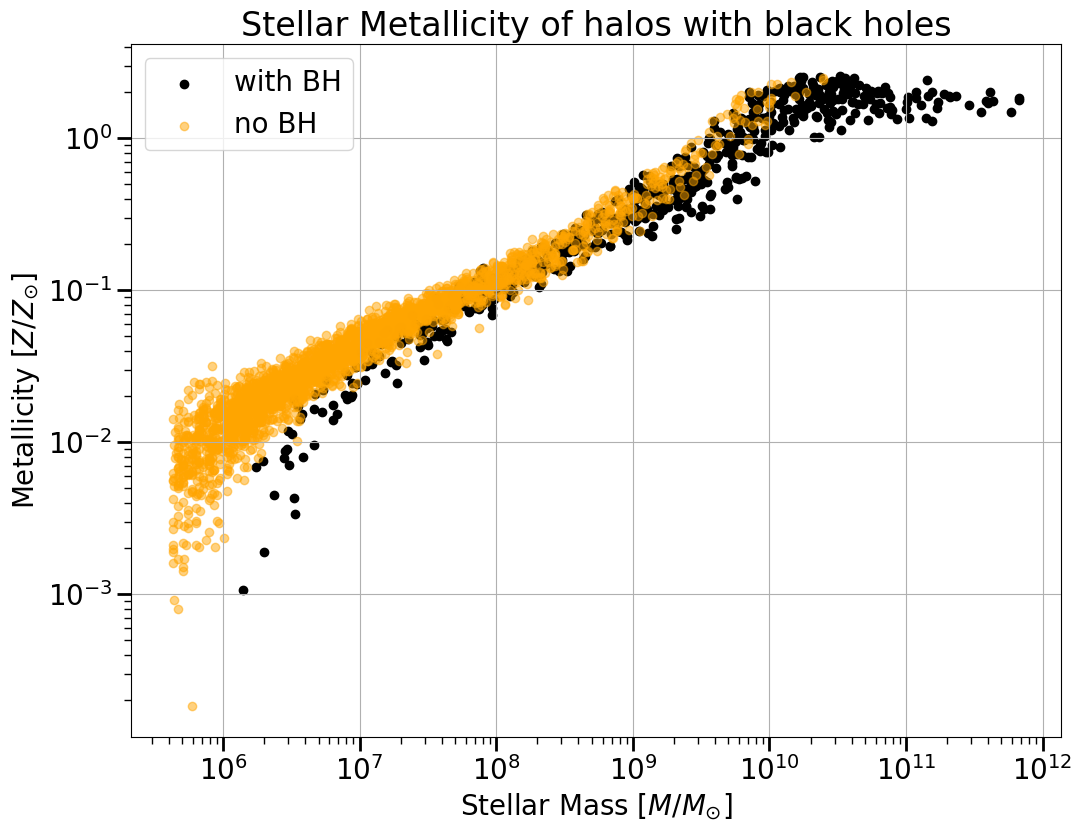

In [8]:
#plotting the stellar metals of halos with BHs
plt.scatter(BH_stellar_mass, BH_stellar_metal/solar_metal, color = "black", label = "with BH")

plt.scatter(stellar_mass_no_BH, stellar_metal_no_BH/solar_metal, label = 'no BH', color = 'orange', alpha = 0.5)

plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e7, 1e10])
#plt.ylim([1e-1, 1e0])

plt.title('Stellar Metallicity of halos with black holes')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
plt.grid()

plt.legend()
plt.show()
#plt.savefig('stellar_metal_(BH).png')

# Cut?

In [9]:
def big_get_halo_ind(arr1, num, i):
    x = []
    if arr1[i] > num:
        x = np.append(x, i)
    return x

In [10]:
def small_get_halo_ind(arr1, num2, i):
    x = []
    if arr1[i] < num2:
        x = np.append(x, i)
    return x

In [11]:
loop1 = np.arange(len(BH_stellar_metal))
loop2 = np.arange(len(stellar_metal_no_BH))
ind_large = []
ind_small = []
ind_small_BH = []
ind_large_BH = []

for i in loop2:
        ind_large = np.append(ind_large, big_get_halo_ind(stellar_metal_no_BH/solar_metal, 0.3, i))
        ind_small = np.append(ind_small, small_get_halo_ind(stellar_metal_no_BH/solar_metal, 0.3, i))
        
for k in loop1:
        ind_small_BH = np.append(ind_small_BH, small_get_halo_ind(BH_stellar_metal/solar_metal, 0.3, k))
        ind_large_BH =  np.append(ind_large_BH, big_get_halo_ind(BH_stellar_metal/solar_metal, 0.3, k))

In [12]:
ind_large = ind_large.astype(int)
ind_small = ind_small.astype(int)
ind_small_BH = ind_small_BH.astype(int)
ind_large_BH = ind_large_BH.astype(int)

In [13]:
stellar_mass_ind_large = stellar_mass_no_BH[ind_large]
stellar_mass_ind_small = stellar_mass_no_BH[ind_small]
BH_stellar_mass_ind_small = BH_stellar_mass[ind_small_BH]

stellar_metal_large = stellar_metal_no_BH[ind_large]
stellar_metal_small = stellar_metal_no_BH[ind_small]
BH_stellar_metal_small = BH_stellar_metal[ind_small_BH]

In [14]:
halo_no_BH_high = halo_no_BH[ind_large]
halo_no_BH_low = halo_no_BH[ind_small]
halo_BH_low = halo_with_BH[ind_small_BH]
halo_BH_high = halo_with_BH[ind_large_BH]

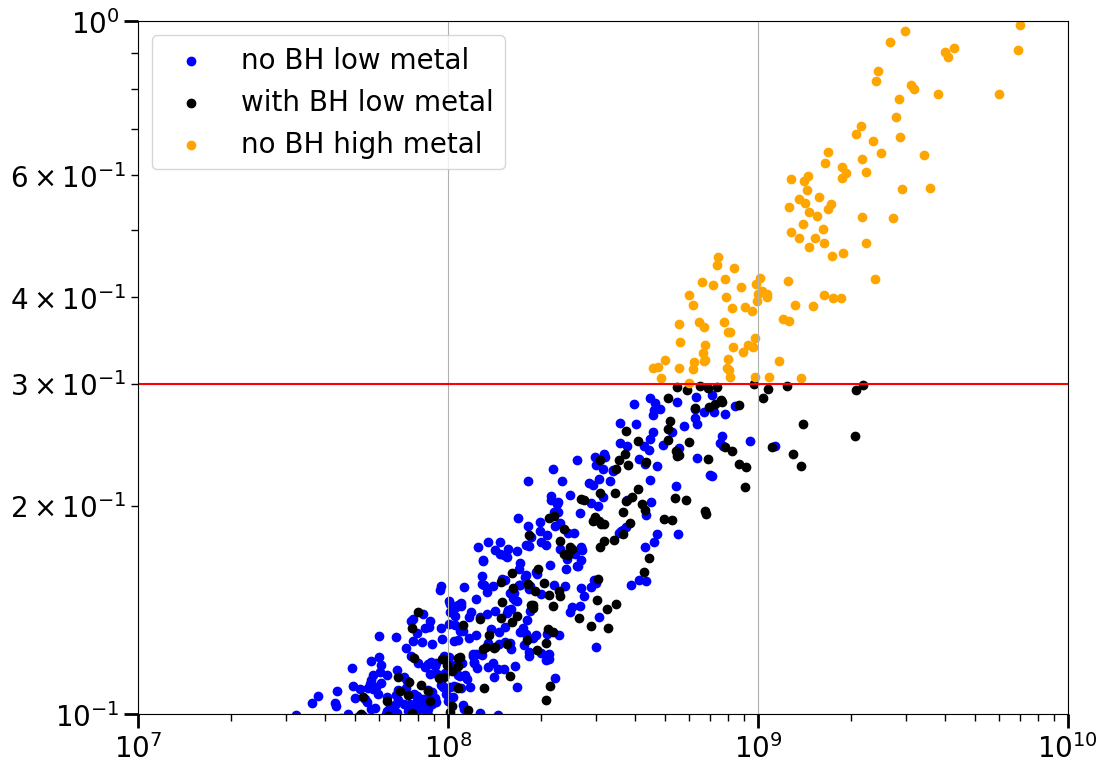

In [15]:
plt.scatter(stellar_mass_ind_small, stellar_metal_small/solar_metal, label = 'no BH low metal', color = 'blue')
plt.scatter(BH_stellar_mass_ind_small, BH_stellar_metal_small/solar_metal, color = "black", label = 'with BH low metal')
plt.scatter(stellar_mass_ind_large, stellar_metal_large/solar_metal, label = 'no BH high metal', color = 'orange')

plt.axhline(y = 0.3, color = 'red')

plt.xscale('log')
plt.yscale('log')
plt.xlim([1e7, 1e10])
plt.ylim([1e-1, 1e0])

plt.grid()
plt.legend()
#plt.show()

plt.savefig("./Pictures/star_cut_zoom.png", bbox_inches='tight')

# SFR

In [16]:
data_raw = step.calculate_all("at(0.9 * radius(200),SFR_encl_25Myr)", "at(0.9 * radius(200),SFR_encl_250Myr)", 'halo_number()')
SFR_master_array = []
for count, item in enumerate(data_raw[0]):
    if item != 0:
        SFR_master_array.append(item)
    elif data_raw[1][count] != 0:
        SFR_master_array.append(data_raw[1][count])
    else:
        SFR_master_array.append((6*10**4)/(250*10**6))
        
host_id_master_array = data_raw[2]

In [17]:
max(host_id_master_array)

4000

In [18]:
SFR_master_array = np.array(SFR_master_array)
loop = np.arange(len(halo_no_BH_high))

SFR_high = np.empty(0)

for i in loop:
    ok = np.where(host_id_master_array == halo_no_BH_high[i])[0]
    SFR_high = np.append(SFR_high, SFR_master_array[ok])

In [19]:
SFR_master_array = np.array(SFR_master_array)
loop = np.arange(len(halo_no_BH_low))

SFR_low = np.empty(0)

for i in loop:
    ok = np.where(host_id_master_array == halo_no_BH_low[i])[0]
    SFR_low = np.append(SFR_low, SFR_master_array[ok])

In [20]:
SFR_master_array = np.array(SFR_master_array)
loop = np.arange(len(halo_BH_low))

BH_SFR_low = np.empty(0)

for i in loop:
    ok = np.where(host_id_master_array == halo_BH_low[i])[0]
    BH_SFR_low = np.append(BH_SFR_low, SFR_master_array[ok])

In [21]:
SFR_master_array = np.array(SFR_master_array)
loop = np.arange(len(halo_BH_high))

BH_SFR_high = np.empty(0)

for i in loop:
    ok = np.where(host_id_master_array == halo_BH_high[i])[0]
    BH_SFR_high = np.append(BH_SFR_high, SFR_master_array[ok])

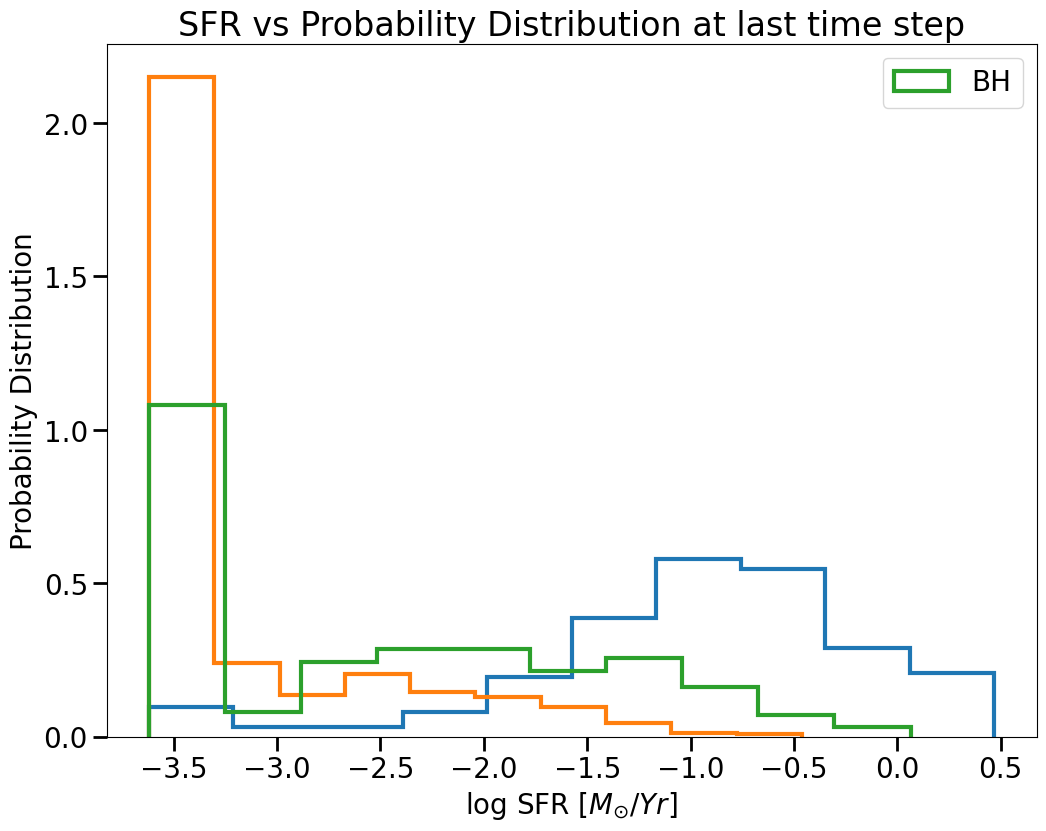

In [22]:
plt.hist(np.log10(SFR_high), bins = 10, density = True, histtype = 'step', lw = 3)
plt.hist(np.log10(SFR_low), bins = 10, density = True, histtype = 'step', lw = 3)
plt.hist(np.log10(BH_SFR_low), bins = 10, density = True, histtype = 'step', lw = 3, label = 'BH')

plt.ylabel('Probability Distribution')
plt.xlabel('log SFR $[M_{\odot}/Yr]$')
plt.title('SFR vs Probability Distribution at last time step')

plt.legend()
plt.show()

# sSFR

I need the Mstar for all the halos above at the different cuts

In [23]:
star_metal_prof_cut_data.keys()

dict_keys(['no_BH_stellar_high', 'no_BH_stellar_low', 'BH_stellar_low', 'halo_num_high_metal_no_BH', 'halo_num_low_metal_no_BH', 'halo_num_low_metal_BH', 'halo_num_high_metal_BH'])

In [24]:
SFR_master_array = np.array(SFR_master_array)
loop = np.arange(len(halo_BH_low))

BH_SFR_low = np.empty(0)

for i in loop:
    ok = np.where(host_id_master_array == halo_BH_low[i])[0]
    BH_SFR_low = np.append(BH_SFR_low, SFR_master_array[ok])

In [25]:
Mstar_all, halo_num = step.calculate_all('Mstar', 'halo_number()')

In [26]:
halo_num_no_BH_high = star_metal_prof_cut_data['halo_num_high_metal_no_BH']
halo_num_no_BH_low = star_metal_prof_cut_data['halo_num_low_metal_no_BH']
halo_num_BH_low = star_metal_prof_cut_data['halo_num_low_metal_BH']
halo_num_BH_high = star_metal_prof_cut_data['halo_num_high_metal_BH']

In [27]:
Mstar_no_BH_high = Mstar_all[halo_num_no_BH_high - 1]
Mstar_no_BH_low = Mstar_all[halo_num_no_BH_low - 1]
Mstar_BH_low = Mstar_all[halo_num_BH_low - 1]
Mstar_BH_high = Mstar_all[halo_num_BH_high - 1]

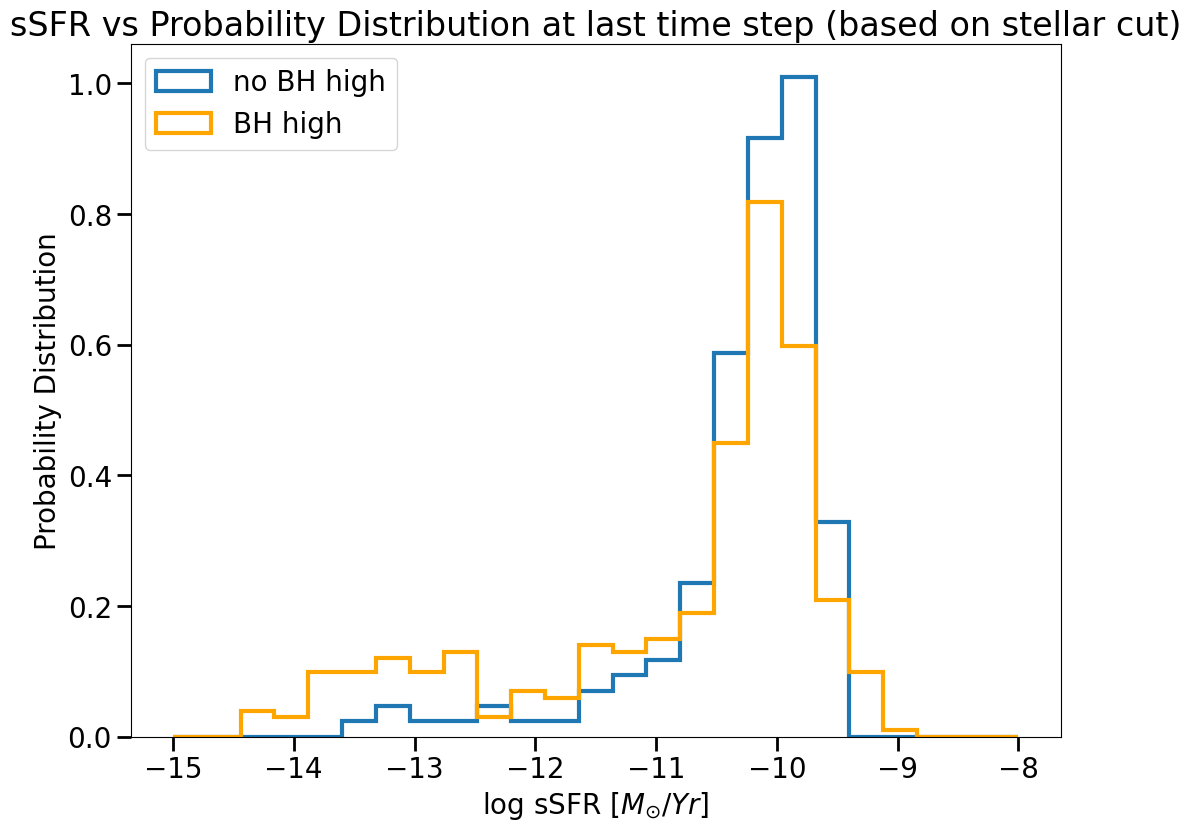

In [28]:
plt.hist(np.log10(SFR_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high', range=[-15, -8])
#plt.hist(np.log10(SFR_low/Mstar_no_BH_low), bins = 10, density = True, histtype = 'step', lw = 3, label = 'no BH low')
#plt.hist(np.log10(BH_SFR_low/Mstar_BH_low), bins = 10, density = True, histtype = 'step', lw = 3, label = 'BH low')
plt.hist(np.log10(BH_SFR_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high', color = 'orange', range=[-15,-8])

plt.ylabel('Probability Distribution')
plt.xlabel('log sSFR $[M_{\odot}/Yr]$')
plt.title('sSFR vs Probability Distribution at last time step (based on stellar cut)')

plt.legend()
#plt.show()
plt.savefig("./Pictures/star_cut_sSFR_high.png", bbox_inches='tight')

In [29]:
statistic, p_value = ks_2samp(np.log10(SFR_low/Mstar_no_BH_low), np.log10(SFR_high/Mstar_no_BH_high))
print(p_value)                          

0.00042637096980765055


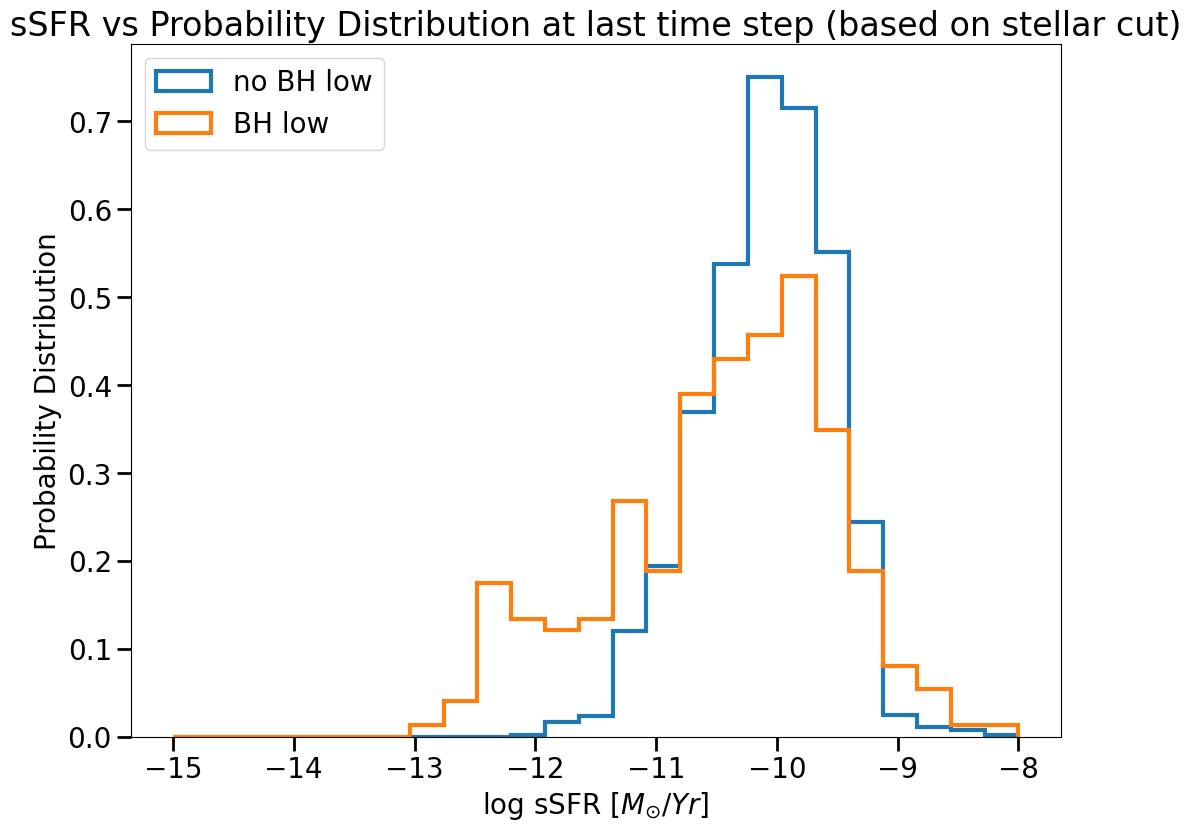

In [30]:
#plt.hist(np.log10(SFR_high/Mstar_no_BH_high), bins = 10, density = True, histtype = 'step', lw = 3, label = 'no BH high')
plt.hist(np.log10(SFR_low/Mstar_no_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH low', range=[-15,-8])
plt.hist(np.log10(BH_SFR_low/Mstar_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH low', range=[-15,-8])
#plt.hist(np.log10(BH_SFR_high/Mstar_BH_high), bins = 10, density = True, histtype = 'step', lw = 3, label = 'BH high', color = 'black')

plt.ylabel('Probability Distribution')
plt.xlabel('log sSFR $[M_{\odot}/Yr]$')
plt.title('sSFR vs Probability Distribution at last time step (based on stellar cut)')

plt.legend()
#plt.show()
plt.savefig("./Pictures/star_cut_sSFR_low.png", bbox_inches='tight')

In [31]:
SFR_save = {'SFR_master' : SFR_master_array,
            'no_BH_high' : SFR_high,
            'no_BH_low' : SFR_low,
            'BH_high' : BH_SFR_high,
            'BH_low' : BH_SFR_low,
            'Mstar_low' : Mstar_no_BH_low,
            'Mstar_high' : Mstar_no_BH_high,
            'Mstar_BH_low' : Mstar_BH_low,
            'Mstar_BH_high' : Mstar_BH_high}

f = open('./Data/stellar_SFR_data.pkl', 'wb')
pickle.dump(SFR_save, f)
f.close()

f = open('./Data/stellar_SFR_data.pkl', 'rb')
SFR_data = pickle.load(f)
f.close()